In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

In [2]:

import keras
from torchsummary import summary
import os
import datasets
import pytorch_models,pytorch_experiment
import torch.optim as optim
import torch
use_cuda=torch.cuda.is_available()

dataset="cifar10"
(x_train, y_train), (x_test, y_test), input_shape,num_classes = datasets.get_data(dataset)


print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')





Using TensorFlow backend.
/home/facundo/.python/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
filters={'mnist':16,'mnist_rot':16,'cifar10':96}
model = pytorch_models.AllConvSTN(input_shape,num_classes,filters=filters[dataset],only_rotation=True)

parameters=pytorch_experiment.add_weight_decay(model.named_parameters(),1e-9)
optimizer = optim.Adam(parameters, lr=0.001)

if use_cuda:
    model=model.cuda()
print(model)
#summary(model, input_size=[1,28,28])


AllConvSTN(
  (stl): LearnableRotationTransformation(
    (locnet): Sequential(
      (0): Conv2d(3, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
      (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (2): ReLU()
      (3): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): ReLU()
      (6): Flatten()
      (7): Linear(in_features=1024, out_features=32, bias=True)
    )
    (fc_loc): Linear(in_features=32, out_features=2, bias=True)
  )
  (net): AllConv(
    (conv): Sequential(
      (0): Conv2d(3, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): ConvBNAct(
        (model): Sequential(
          (0): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(96, eps=1e-05,

In [4]:

rotated_model=pytorch_models.AllConvSTN(input_shape,num_classes,filters=filters[dataset])
if use_cuda:
    rotated_model= rotated_model.cuda()


rotated_parameters=pytorch_experiment.add_weight_decay(rotated_model.named_parameters(),1e-12)
rotated_optimizer = optim.Adam(rotated_parameters, lr=0.001)

print(rotated_model)
#summary(model, input_size=[1,28,28])



AllConvSTN(
  (stl): LearnableRotationTransformation(
    (locnet): Sequential(
      (0): Conv2d(3, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
      (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (2): ReLU()
      (3): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): ReLU()
      (6): Flatten()
      (7): Linear(in_features=1024, out_features=32, bias=True)
    )
    (fc_loc): Linear(in_features=32, out_features=2, bias=True)
  )
  (net): AllConv(
    (conv): Sequential(
      (0): Conv2d(3, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): ConvBNAct(
        (model): Sequential(
          (0): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(96, eps=1e-05,

Training model with unrotated dataset...


Epoch 1: 100% (batch 782/782)  ==stats==> loss:    1.4, accuracy:  0.491, Time:  0:00:42


Test => Loss: 1.2048, Accuracy: 57.04% (5704/10000)


Epoch 2: 100% (batch 782/782)  ==stats==> loss:   1.06, accuracy:  0.621, Time:  0:00:41


Test => Loss: 0.9258, Accuracy: 66.81% (6681/10000)


Epoch 3: 100% (batch 782/782)  ==stats==> loss:  0.843, accuracy:  0.698, Time:  0:00:41


Test => Loss: 0.8183, Accuracy: 71.19% (7119/10000)


Epoch 4: 100% (batch 782/782)  ==stats==> loss:  0.729, accuracy:  0.743, Time:  0:00:41


Test => Loss: 0.6956, Accuracy: 76.17% (7617/10000)


Epoch 5: 100% (batch 782/782)  ==stats==> loss:  0.632, accuracy:  0.778, Time:  0:00:42


Test => Loss: 0.6746, Accuracy: 76.48% (7648/10000)


Epoch 6: 100% (batch 782/782)  ==stats==> loss:   0.55, accuracy:  0.806, Time:  0:00:44


Test => Loss: 0.6138, Accuracy: 78.96% (7896/10000)


Epoch 7: 100% (batch 782/782)  ==stats==> loss:  0.468, accuracy:  0.835, Time:  0:00:44


Test => Loss: 0.6005, Accuracy: 79.43% (7943/10000)


Epoch 8: 100% (batch 782/782)  ==stats==> loss:  0.401, accuracy:  0.858, Time:  0:00:44


Test => Loss: 0.6205, Accuracy: 79.80% (7980/10000)


Epoch 9: 100% (batch 782/782)  ==stats==> loss:  0.336, accuracy:  0.882, Time:  0:00:44


Test => Loss: 0.5750, Accuracy: 81.53% (8153/10000)


Epoch 10: 100% (batch 782/782)  ==stats==> loss:  0.273, accuracy:  0.904, Time:  0:00:42


Test => Loss: 0.5761, Accuracy: 81.95% (8195/10000)


Epoch 11: 100% (batch 782/782)  ==stats==> loss:  0.222, accuracy:  0.922, Time:  0:00:44


Test => Loss: 0.6261, Accuracy: 81.19% (8119/10000)


Epoch 12: 100% (batch 782/782)  ==stats==> loss:  0.169, accuracy:  0.941, Time:  0:00:43


Test => Loss: 0.6485, Accuracy: 82.10% (8210/10000)


Epoch 13: 100% (batch 782/782)  ==stats==> loss:  0.142, accuracy:   0.95, Time:  0:00:43


Test => Loss: 0.6447, Accuracy: 81.86% (8186/10000)


Epoch 14: 100% (batch 782/782)  ==stats==> loss:  0.113, accuracy:   0.96, Time:  0:00:44


Test => Loss: 0.8043, Accuracy: 80.80% (8080/10000)


Epoch 15: 100% (batch 782/782)  ==stats==> loss:  0.101, accuracy:  0.964, Time:  0:00:43


Test => Loss: 0.8028, Accuracy: 81.73% (8173/10000)


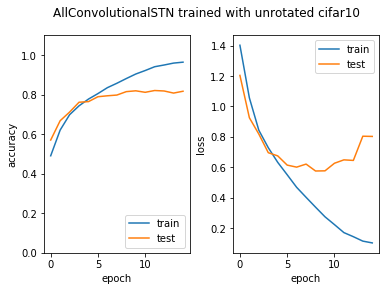

Skipping pretraining rotated model with unrotated dataset
Training rotated model with rotated dataset...


Epoch 1: 100% (batch 782/782)  ==stats==> loss:   1.94, accuracy:  0.301, Time:  0:00:45


Test => Loss: 1.8355, Accuracy: 35.25% (3525/10000)


Epoch 2: 100% (batch 782/782)  ==stats==> loss:   1.81, accuracy:  0.342, Time:  0:00:43


Test => Loss: 1.7115, Accuracy: 38.09% (3809/10000)


Epoch 3: 100% (batch 782/782)  ==stats==> loss:   1.62, accuracy:   0.41, Time:  0:00:44


Test => Loss: 1.5443, Accuracy: 43.33% (4333/10000)


Epoch 4: 100% (batch 782/782)  ==stats==> loss:   1.54, accuracy:   0.44, Time:  0:00:44


Test => Loss: 1.5208, Accuracy: 44.49% (4449/10000)


Epoch 5: 100% (batch 782/782)  ==stats==> loss:   1.47, accuracy:  0.467, Time:  0:00:43


Test => Loss: 1.5102, Accuracy: 45.34% (4534/10000)


Epoch 6: 100% (batch 782/782)  ==stats==> loss:   1.41, accuracy:  0.491, Time:  0:00:44


Test => Loss: 1.3695, Accuracy: 50.81% (5081/10000)


Epoch 7: 100% (batch 782/782)  ==stats==> loss:   1.35, accuracy:  0.512, Time:  0:00:37


Test => Loss: 1.3612, Accuracy: 51.31% (5131/10000)


Epoch 8: 100% (batch 782/782)  ==stats==> loss:   1.29, accuracy:  0.531, Time:  0:00:38


Test => Loss: 1.2710, Accuracy: 54.67% (5467/10000)


Epoch 9: 100% (batch 782/782)  ==stats==> loss:   1.25, accuracy:   0.55, Time:  0:00:38


Test => Loss: 1.2577, Accuracy: 54.87% (5487/10000)


Epoch 10: 100% (batch 782/782)  ==stats==> loss:   1.21, accuracy:  0.564, Time:  0:00:38


Test => Loss: 1.2188, Accuracy: 57.01% (5701/10000)


Epoch 11: 100% (batch 782/782)  ==stats==> loss:   1.17, accuracy:  0.581, Time:  0:00:38


Test => Loss: 1.1678, Accuracy: 57.95% (5795/10000)


Epoch 12: 100% (batch 782/782)  ==stats==> loss:   1.14, accuracy:  0.595, Time:  0:00:38


Test => Loss: 1.1277, Accuracy: 59.50% (5950/10000)


Epoch 13: 100% (batch 782/782)  ==stats==> loss:   1.11, accuracy:  0.603, Time:  0:00:31


Test => Loss: 1.0857, Accuracy: 61.61% (6161/10000)


Epoch 14: 100% (batch 782/782)  ==stats==> loss:   1.08, accuracy:  0.618, Time:  0:00:25


Test => Loss: 1.1222, Accuracy: 60.46% (6046/10000)


Epoch 15: 100% (batch 782/782)  ==stats==> loss:   1.05, accuracy:  0.626, Time:  0:00:20


Test => Loss: 1.0537, Accuracy: 62.54% (6254/10000)


Epoch 16: 100% (batch 782/782)  ==stats==> loss:   1.01, accuracy:  0.642, Time:  0:00:18


Test => Loss: 1.0153, Accuracy: 63.97% (6397/10000)


Epoch 17: 100% (batch 782/782)  ==stats==> loss:  0.991, accuracy:  0.651, Time:  0:00:18


Test => Loss: 1.0421, Accuracy: 63.04% (6304/10000)


Epoch 18: 100% (batch 782/782)  ==stats==> loss:  0.966, accuracy:  0.658, Time:  0:00:18


Test => Loss: 1.0209, Accuracy: 63.95% (6395/10000)


Epoch 19: 100% (batch 782/782)  ==stats==> loss:  0.944, accuracy:  0.666, Time:  0:00:18


Test => Loss: 0.9848, Accuracy: 65.19% (6519/10000)


Epoch 20: 100% (batch 782/782)  ==stats==> loss:  0.919, accuracy:  0.676, Time:  0:00:18


Test => Loss: 0.9575, Accuracy: 66.77% (6677/10000)


Epoch 21: 100% (batch 782/782)  ==stats==> loss:  0.901, accuracy:  0.681, Time:  0:00:18


Test => Loss: 0.9225, Accuracy: 68.18% (6818/10000)


Epoch 22: 100% (batch 782/782)  ==stats==> loss:  0.881, accuracy:  0.691, Time:  0:00:18


Test => Loss: 0.9541, Accuracy: 66.67% (6667/10000)


Epoch 23: 100% (batch 782/782)  ==stats==> loss:  0.861, accuracy:  0.696, Time:  0:00:18


Test => Loss: 0.9063, Accuracy: 67.93% (6793/10000)


Epoch 24: 100% (batch 782/782)  ==stats==> loss:  0.845, accuracy:  0.702, Time:  0:00:18


Test => Loss: 0.9218, Accuracy: 67.64% (6764/10000)


Epoch 25: 100% (batch 782/782)  ==stats==> loss:  0.827, accuracy:  0.708, Time:  0:00:18


Test => Loss: 0.8675, Accuracy: 69.78% (6978/10000)


Epoch 26: 100% (batch 782/782)  ==stats==> loss:  0.808, accuracy:  0.716, Time:  0:00:18


Test => Loss: 0.9156, Accuracy: 68.56% (6856/10000)


Epoch 27: 100% (batch 782/782)  ==stats==> loss:  0.799, accuracy:  0.719, Time:  0:00:18


Test => Loss: 0.8850, Accuracy: 69.37% (6937/10000)


Epoch 28: 100% (batch 782/782)  ==stats==> loss:  0.786, accuracy:  0.725, Time:  0:00:18


Test => Loss: 0.8809, Accuracy: 69.35% (6935/10000)


Epoch 29: 100% (batch 782/782)  ==stats==> loss:  0.768, accuracy:  0.731, Time:  0:00:18


Test => Loss: 0.8372, Accuracy: 71.46% (7146/10000)


Epoch 30: 100% (batch 782/782)  ==stats==> loss:  0.759, accuracy:  0.734, Time:  0:00:18


Test => Loss: 0.8578, Accuracy: 70.82% (7082/10000)


Epoch 31: 100% (batch 782/782)  ==stats==> loss:  0.741, accuracy:   0.74, Time:  0:00:18


Test => Loss: 0.8510, Accuracy: 70.83% (7083/10000)


Epoch 32: 100% (batch 782/782)  ==stats==> loss:   0.73, accuracy:  0.745, Time:  0:00:18


Test => Loss: 0.8474, Accuracy: 70.83% (7083/10000)


Epoch 33: 100% (batch 782/782)  ==stats==> loss:  0.717, accuracy:  0.751, Time:  0:00:18


Test => Loss: 0.8450, Accuracy: 71.06% (7106/10000)


Epoch 34: 100% (batch 782/782)  ==stats==> loss:  0.714, accuracy:  0.748, Time:  0:00:18


Test => Loss: 0.8389, Accuracy: 70.92% (7092/10000)


Epoch 35: 100% (batch 782/782)  ==stats==> loss:  0.705, accuracy:  0.753, Time:  0:00:18


Test => Loss: 0.8307, Accuracy: 71.21% (7121/10000)


Epoch 36: 100% (batch 782/782)  ==stats==> loss:  0.687, accuracy:  0.758, Time:  0:00:19


Test => Loss: 0.8866, Accuracy: 69.77% (6977/10000)


Epoch 37: 100% (batch 782/782)  ==stats==> loss:  0.684, accuracy:  0.759, Time:  0:00:19


Test => Loss: 0.8055, Accuracy: 72.25% (7225/10000)


Epoch 38: 100% (batch 782/782)  ==stats==> loss:  0.673, accuracy:  0.766, Time:  0:00:19


Test => Loss: 0.8046, Accuracy: 72.49% (7249/10000)


Epoch 39: 100% (batch 782/782)  ==stats==> loss:   0.66, accuracy:  0.768, Time:  0:00:19


Test => Loss: 0.8020, Accuracy: 72.37% (7237/10000)


Epoch 40: 100% (batch 782/782)  ==stats==> loss:  0.647, accuracy:  0.771, Time:  0:00:18


Test => Loss: 0.8169, Accuracy: 72.59% (7259/10000)


Epoch 41: 100% (batch 782/782)  ==stats==> loss:  0.642, accuracy:  0.774, Time:  0:00:18


Test => Loss: 0.7989, Accuracy: 72.75% (7275/10000)


Epoch 42: 100% (batch 782/782)  ==stats==> loss:  0.634, accuracy:  0.776, Time:  0:00:18


Test => Loss: 0.8813, Accuracy: 70.36% (7036/10000)


Epoch 43: 100% (batch 782/782)  ==stats==> loss:  0.624, accuracy:   0.78, Time:  0:00:19


Test => Loss: 0.7953, Accuracy: 72.87% (7287/10000)


Epoch 44: 100% (batch 782/782)  ==stats==> loss:   0.62, accuracy:  0.784, Time:  0:00:18


Test => Loss: 0.7546, Accuracy: 73.98% (7398/10000)


Epoch 45: 100% (batch 782/782)  ==stats==> loss:  0.612, accuracy:  0.784, Time:  0:00:19


Test => Loss: 0.7922, Accuracy: 73.01% (7301/10000)


Epoch 46: 100% (batch 782/782)  ==stats==> loss:  0.604, accuracy:  0.787, Time:  0:00:19


Test => Loss: 0.7777, Accuracy: 73.03% (7303/10000)


Epoch 47: 100% (batch 782/782)  ==stats==> loss:  0.588, accuracy:  0.794, Time:  0:00:19


Test => Loss: 0.7899, Accuracy: 73.63% (7363/10000)


Epoch 48: 100% (batch 782/782)  ==stats==> loss:   0.59, accuracy:  0.793, Time:  0:00:19


Test => Loss: 0.7584, Accuracy: 73.72% (7372/10000)


Epoch 49: 100% (batch 782/782)  ==stats==> loss:   0.58, accuracy:  0.794, Time:  0:00:18


Test => Loss: 0.7997, Accuracy: 73.11% (7311/10000)


Epoch 50: 100% (batch 782/782)  ==stats==> loss:  0.572, accuracy:  0.798, Time:  0:00:18


Test => Loss: 0.7929, Accuracy: 73.61% (7361/10000)


Epoch 51: 100% (batch 782/782)  ==stats==> loss:  0.565, accuracy:  0.799, Time:  0:00:19


Test => Loss: 0.7909, Accuracy: 73.36% (7336/10000)


Epoch 52: 100% (batch 782/782)  ==stats==> loss:  0.556, accuracy:  0.803, Time:  0:00:18


Test => Loss: 0.7766, Accuracy: 73.77% (7377/10000)


Epoch 53: 100% (batch 782/782)  ==stats==> loss:  0.556, accuracy:  0.804, Time:  0:00:18


Test => Loss: 0.7920, Accuracy: 73.80% (7380/10000)


Epoch 54: 100% (batch 782/782)  ==stats==> loss:  0.545, accuracy:  0.808, Time:  0:00:19


Test => Loss: 0.7534, Accuracy: 74.77% (7477/10000)


Epoch 55: 100% (batch 782/782)  ==stats==> loss:  0.536, accuracy:   0.81, Time:  0:00:18


Test => Loss: 0.7859, Accuracy: 73.43% (7343/10000)


Epoch 56: 100% (batch 782/782)  ==stats==> loss:  0.534, accuracy:  0.811, Time:  0:00:18


Test => Loss: 0.7893, Accuracy: 73.84% (7384/10000)


Epoch 57: 100% (batch 782/782)  ==stats==> loss:  0.529, accuracy:  0.813, Time:  0:00:19


Test => Loss: 0.7652, Accuracy: 73.93% (7393/10000)


Epoch 58: 100% (batch 782/782)  ==stats==> loss:  0.524, accuracy:  0.816, Time:  0:00:18


Test => Loss: 0.7698, Accuracy: 73.63% (7363/10000)


Epoch 59: 100% (batch 782/782)  ==stats==> loss:  0.512, accuracy:   0.82, Time:  0:00:18


Test => Loss: 0.7741, Accuracy: 74.35% (7435/10000)


Epoch 60: 100% (batch 782/782)  ==stats==> loss:  0.503, accuracy:  0.822, Time:  0:00:18


Test => Loss: 0.8037, Accuracy: 73.37% (7337/10000)


Epoch 61: 100% (batch 782/782)  ==stats==> loss:  0.502, accuracy:  0.824, Time:  0:00:18


Test => Loss: 0.7746, Accuracy: 74.34% (7434/10000)


Epoch 62: 100% (batch 782/782)  ==stats==> loss:    0.5, accuracy:  0.824, Time:  0:00:18


Test => Loss: 0.8087, Accuracy: 74.08% (7408/10000)


Epoch 63: 100% (batch 782/782)  ==stats==> loss:  0.492, accuracy:  0.826, Time:  0:00:18


Test => Loss: 0.7488, Accuracy: 74.95% (7495/10000)


Epoch 64: 100% (batch 782/782)  ==stats==> loss:  0.484, accuracy:  0.828, Time:  0:00:18


Test => Loss: 0.7706, Accuracy: 74.98% (7498/10000)


Epoch 65: 100% (batch 782/782)  ==stats==> loss:  0.481, accuracy:   0.83, Time:  0:00:18


Test => Loss: 0.7724, Accuracy: 74.83% (7483/10000)


Epoch 66: 100% (batch 782/782)  ==stats==> loss:  0.478, accuracy:  0.831, Time:  0:00:18


Test => Loss: 0.7868, Accuracy: 73.97% (7397/10000)


Epoch 67: 100% (batch 782/782)  ==stats==> loss:  0.469, accuracy:  0.833, Time:  0:00:18


Test => Loss: 0.7967, Accuracy: 74.62% (7462/10000)


Epoch 68: 100% (batch 782/782)  ==stats==> loss:  0.464, accuracy:  0.837, Time:  0:00:18


Test => Loss: 0.7527, Accuracy: 75.21% (7521/10000)


Epoch 69: 100% (batch 782/782)  ==stats==> loss:  0.456, accuracy:  0.839, Time:  0:00:18


Test => Loss: 0.8154, Accuracy: 74.18% (7418/10000)


Epoch 70: 100% (batch 782/782)  ==stats==> loss:  0.456, accuracy:  0.838, Time:  0:00:18


Test => Loss: 0.7543, Accuracy: 75.03% (7503/10000)


Epoch 71: 100% (batch 782/782)  ==stats==> loss:  0.451, accuracy:  0.842, Time:  0:00:18


Test => Loss: 0.8208, Accuracy: 74.09% (7409/10000)


Epoch 72: 100% (batch 782/782)  ==stats==> loss:   0.44, accuracy:  0.842, Time:  0:00:18


Test => Loss: 0.7831, Accuracy: 75.20% (7520/10000)


Epoch 73: 100% (batch 782/782)  ==stats==> loss:  0.443, accuracy:  0.843, Time:  0:00:18


Test => Loss: 0.7852, Accuracy: 75.36% (7536/10000)


Epoch 74: 100% (batch 782/782)  ==stats==> loss:   0.44, accuracy:  0.843, Time:  0:00:18


Test => Loss: 0.8190, Accuracy: 74.64% (7464/10000)


Epoch 75: 100% (batch 782/782)  ==stats==> loss:  0.432, accuracy:  0.846, Time:  0:00:18


Test => Loss: 0.8352, Accuracy: 74.07% (7407/10000)


Epoch 76: 100% (batch 782/782)  ==stats==> loss:  0.425, accuracy:  0.852, Time:  0:00:18


Test => Loss: 0.7790, Accuracy: 75.37% (7537/10000)


Epoch 77: 100% (batch 782/782)  ==stats==> loss:  0.424, accuracy:   0.85, Time:  0:00:18


Test => Loss: 0.7807, Accuracy: 75.31% (7531/10000)


Epoch 78: 100% (batch 782/782)  ==stats==> loss:  0.418, accuracy:  0.851, Time:  0:00:18


Test => Loss: 0.8284, Accuracy: 74.27% (7427/10000)


Epoch 79: 100% (batch 782/782)  ==stats==> loss:  0.416, accuracy:  0.852, Time:  0:00:19


Test => Loss: 0.8022, Accuracy: 75.42% (7542/10000)


Epoch 80: 100% (batch 782/782)  ==stats==> loss:  0.413, accuracy:  0.854, Time:  0:00:18


Test => Loss: 0.8048, Accuracy: 75.23% (7523/10000)


Epoch 81: 100% (batch 782/782)  ==stats==> loss:  0.408, accuracy:  0.855, Time:  0:00:18


Test => Loss: 0.8043, Accuracy: 74.78% (7478/10000)


Epoch 82: 100% (batch 782/782)  ==stats==> loss:  0.407, accuracy:  0.855, Time:  0:00:18


Test => Loss: 0.7962, Accuracy: 75.22% (7522/10000)


Epoch 83: 100% (batch 782/782)  ==stats==> loss:  0.399, accuracy:  0.858, Time:  0:00:18


Test => Loss: 0.8031, Accuracy: 74.64% (7464/10000)


Epoch 84: 100% (batch 782/782)  ==stats==> loss:  0.395, accuracy:   0.86, Time:  0:00:19


Test => Loss: 0.8083, Accuracy: 74.57% (7457/10000)


Epoch 85: 100% (batch 782/782)  ==stats==> loss:  0.393, accuracy:   0.86, Time:  0:00:18


Test => Loss: 0.7846, Accuracy: 75.55% (7555/10000)


Epoch 86: 100% (batch 782/782)  ==stats==> loss:  0.387, accuracy:  0.863, Time:  0:00:18


Test => Loss: 0.7971, Accuracy: 75.08% (7508/10000)


Epoch 87: 100% (batch 782/782)  ==stats==> loss:  0.382, accuracy:  0.863, Time:  0:00:18


Test => Loss: 0.7954, Accuracy: 75.63% (7563/10000)


Epoch 88: 100% (batch 782/782)  ==stats==> loss:  0.384, accuracy:  0.863, Time:  0:00:18


Test => Loss: 0.8020, Accuracy: 75.25% (7525/10000)


Epoch 89: 100% (batch 782/782)  ==stats==> loss:  0.381, accuracy:  0.866, Time:  0:00:18


Test => Loss: 0.7913, Accuracy: 75.34% (7534/10000)


Epoch 90: 100% (batch 782/782)  ==stats==> loss:  0.375, accuracy:  0.865, Time:  0:00:19


Test => Loss: 0.8514, Accuracy: 74.66% (7466/10000)


Epoch 91: 100% (batch 782/782)  ==stats==> loss:  0.371, accuracy:  0.868, Time:  0:00:18


Test => Loss: 0.8297, Accuracy: 74.93% (7493/10000)


Epoch 92: 100% (batch 782/782)  ==stats==> loss:  0.365, accuracy:  0.869, Time:  0:00:18


Test => Loss: 0.8339, Accuracy: 75.25% (7525/10000)


Epoch 93: 100% (batch 782/782)  ==stats==> loss:  0.362, accuracy:   0.87, Time:  0:00:18


Test => Loss: 0.8034, Accuracy: 75.09% (7509/10000)


Epoch 94: 100% (batch 782/782)  ==stats==> loss:  0.358, accuracy:  0.871, Time:  0:00:18


Test => Loss: 0.8055, Accuracy: 75.87% (7587/10000)


Epoch 95: 100% (batch 782/782)  ==stats==> loss:  0.358, accuracy:  0.873, Time:  0:00:18


Test => Loss: 0.8714, Accuracy: 74.87% (7487/10000)


Epoch 96: 100% (batch 782/782)  ==stats==> loss:  0.348, accuracy:  0.877, Time:  0:00:19


Test => Loss: 0.8289, Accuracy: 75.68% (7568/10000)


Epoch 97: 100% (batch 782/782)  ==stats==> loss:  0.351, accuracy:  0.874, Time:  0:00:19


Test => Loss: 0.8761, Accuracy: 75.29% (7529/10000)


Epoch 98: 100% (batch 782/782)  ==stats==> loss:  0.345, accuracy:  0.876, Time:  0:00:18


Test => Loss: 0.8906, Accuracy: 74.76% (7476/10000)


Epoch 99: 100% (batch 782/782)  ==stats==> loss:  0.338, accuracy:   0.88, Time:  0:00:19


Test => Loss: 0.8531, Accuracy: 74.94% (7494/10000)


Epoch 100: 100% (batch 782/782)  ==stats==> loss:  0.337, accuracy:  0.879, Time:  0:00:18


Test => Loss: 0.8362, Accuracy: 75.10% (7510/10000)


Epoch 101: 100% (batch 782/782)  ==stats==> loss:  0.341, accuracy:  0.878, Time:  0:00:22


Test => Loss: 0.8782, Accuracy: 75.37% (7537/10000)


Epoch 102: 100% (batch 782/782)  ==stats==> loss:  0.338, accuracy:  0.878, Time:  0:00:26


Test => Loss: 0.8452, Accuracy: 74.27% (7427/10000)


Epoch 103: 100% (batch 782/782)  ==stats==> loss:  0.329, accuracy:  0.881, Time:  0:00:26


Test => Loss: 0.8457, Accuracy: 74.84% (7484/10000)


Epoch 104: 100% (batch 782/782)  ==stats==> loss:  0.327, accuracy:  0.883, Time:  0:00:26


Test => Loss: 0.8307, Accuracy: 75.39% (7539/10000)


Epoch 105: 100% (batch 782/782)  ==stats==> loss:  0.325, accuracy:  0.884, Time:  0:00:26


Test => Loss: 0.8766, Accuracy: 75.46% (7546/10000)


Epoch 106: 100% (batch 782/782)  ==stats==> loss:   0.32, accuracy:  0.885, Time:  0:00:26


Test => Loss: 0.8381, Accuracy: 75.88% (7588/10000)


Epoch 107: 100% (batch 782/782)  ==stats==> loss:  0.325, accuracy:  0.885, Time:  0:00:26


Test => Loss: 0.8450, Accuracy: 75.44% (7544/10000)


Epoch 108: 100% (batch 782/782)  ==stats==> loss:  0.319, accuracy:  0.885, Time:  0:00:26


Test => Loss: 0.8347, Accuracy: 75.56% (7556/10000)


Epoch 109: 100% (batch 782/782)  ==stats==> loss:  0.318, accuracy:  0.886, Time:  0:00:23


Test => Loss: 0.8766, Accuracy: 75.22% (7522/10000)


Epoch 110: 100% (batch 782/782)  ==stats==> loss:  0.312, accuracy:  0.887, Time:  0:00:23


Test => Loss: 0.8347, Accuracy: 75.39% (7539/10000)


Epoch 111: 100% (batch 782/782)  ==stats==> loss:  0.312, accuracy:  0.888, Time:  0:00:26


Test => Loss: 0.8495, Accuracy: 76.03% (7603/10000)


Epoch 112: 100% (batch 782/782)  ==stats==> loss:  0.306, accuracy:   0.89, Time:  0:00:28


Test => Loss: 0.8706, Accuracy: 75.64% (7564/10000)


Epoch 113: 100% (batch 782/782)  ==stats==> loss:  0.307, accuracy:  0.891, Time:  0:00:29


Test => Loss: 0.8626, Accuracy: 75.56% (7556/10000)


Epoch 114: 100% (batch 782/782)  ==stats==> loss:  0.305, accuracy:  0.891, Time:  0:00:23


Test => Loss: 0.8713, Accuracy: 75.29% (7529/10000)


Epoch 115: 100% (batch 782/782)  ==stats==> loss:  0.295, accuracy:  0.893, Time:  0:00:23


Test => Loss: 0.9173, Accuracy: 75.51% (7551/10000)


Epoch 116: 100% (batch 782/782)  ==stats==> loss:  0.294, accuracy:  0.894, Time:  0:00:23


Test => Loss: 0.9050, Accuracy: 75.00% (7500/10000)


Epoch 117: 100% (batch 782/782)  ==stats==> loss:  0.295, accuracy:  0.894, Time:  0:00:23


Test => Loss: 0.8867, Accuracy: 75.41% (7541/10000)


Epoch 118: 100% (batch 782/782)  ==stats==> loss:  0.296, accuracy:  0.895, Time:  0:00:23


Test => Loss: 0.8650, Accuracy: 75.34% (7534/10000)


Epoch 119: 100% (batch 782/782)  ==stats==> loss:  0.283, accuracy:  0.897, Time:  0:00:23


Test => Loss: 0.9216, Accuracy: 75.14% (7514/10000)


Epoch 120: 100% (batch 782/782)  ==stats==> loss:  0.284, accuracy:  0.898, Time:  0:00:22


Test => Loss: 0.8881, Accuracy: 75.47% (7547/10000)


Epoch 121: 100% (batch 782/782)  ==stats==> loss:  0.286, accuracy:  0.898, Time:  0:00:23


Test => Loss: 0.9046, Accuracy: 75.84% (7584/10000)


Epoch 122: 100% (batch 782/782)  ==stats==> loss:  0.283, accuracy:  0.898, Time:  0:00:23


Test => Loss: 0.8977, Accuracy: 74.98% (7498/10000)


Epoch 123: 100% (batch 782/782)  ==stats==> loss:  0.284, accuracy:  0.898, Time:  0:00:22


Test => Loss: 0.8602, Accuracy: 75.73% (7573/10000)


Epoch 124: 100% (batch 782/782)  ==stats==> loss:  0.279, accuracy:  0.899, Time:  0:00:22


Test => Loss: 0.9288, Accuracy: 75.84% (7584/10000)


Epoch 125: 100% (batch 782/782)  ==stats==> loss:  0.271, accuracy:  0.903, Time:  0:00:23


Test => Loss: 0.8739, Accuracy: 75.51% (7551/10000)


Epoch 126: 100% (batch 782/782)  ==stats==> loss:  0.276, accuracy:  0.901, Time:  0:00:22


Test => Loss: 0.9173, Accuracy: 75.10% (7510/10000)


Epoch 127: 100% (batch 782/782)  ==stats==> loss:  0.273, accuracy:  0.901, Time:  0:00:41


Test => Loss: 0.9138, Accuracy: 75.31% (7531/10000)


Epoch 128: 100% (batch 782/782)  ==stats==> loss:  0.273, accuracy:  0.902, Time:  0:00:41


Test => Loss: 0.8962, Accuracy: 75.32% (7532/10000)


Epoch 129: 100% (batch 782/782)  ==stats==> loss:  0.266, accuracy:  0.904, Time:  0:00:40


Test => Loss: 0.9008, Accuracy: 74.92% (7492/10000)


Epoch 130: 100% (batch 782/782)  ==stats==> loss:  0.265, accuracy:  0.905, Time:  0:00:42


Test => Loss: 0.9149, Accuracy: 75.39% (7539/10000)


Epoch 131: 100% (batch 782/782)  ==stats==> loss:  0.267, accuracy:  0.904, Time:  0:00:42


Test => Loss: 0.8994, Accuracy: 75.09% (7509/10000)


Epoch 132: 100% (batch 782/782)  ==stats==> loss:   0.26, accuracy:  0.908, Time:  0:00:39


Test => Loss: 0.9111, Accuracy: 75.39% (7539/10000)


Epoch 133: 100% (batch 782/782)  ==stats==> loss:  0.255, accuracy:  0.907, Time:  0:00:42


Test => Loss: 0.8977, Accuracy: 75.90% (7590/10000)


Epoch 134: 100% (batch 782/782)  ==stats==> loss:   0.26, accuracy:  0.906, Time:  0:00:41


Test => Loss: 0.9367, Accuracy: 75.34% (7534/10000)


Epoch 135: 100% (batch 782/782)  ==stats==> loss:  0.258, accuracy:  0.907, Time:  0:00:39


Test => Loss: 0.8977, Accuracy: 75.84% (7584/10000)


Epoch 136: 100% (batch 782/782)  ==stats==> loss:  0.253, accuracy:  0.911, Time:  0:00:45


Test => Loss: 0.9300, Accuracy: 75.25% (7525/10000)


Epoch 137: 100% (batch 782/782)  ==stats==> loss:  0.253, accuracy:   0.91, Time:  0:00:44


Test => Loss: 0.8965, Accuracy: 75.79% (7579/10000)


Epoch 138: 100% (batch 782/782)  ==stats==> loss:  0.248, accuracy:  0.911, Time:  0:00:41


Test => Loss: 0.9433, Accuracy: 75.00% (7500/10000)


Epoch 139: 100% (batch 782/782)  ==stats==> loss:  0.247, accuracy:  0.911, Time:  0:00:42


Test => Loss: 0.9490, Accuracy: 75.16% (7516/10000)


Epoch 140: 100% (batch 782/782)  ==stats==> loss:  0.251, accuracy:   0.91, Time:  0:00:38


Test => Loss: 0.9253, Accuracy: 74.88% (7488/10000)


Epoch 141: 100% (batch 782/782)  ==stats==> loss:  0.247, accuracy:  0.911, Time:  0:00:36


Test => Loss: 0.9306, Accuracy: 74.98% (7498/10000)


Epoch 142: 100% (batch 782/782)  ==stats==> loss:  0.243, accuracy:  0.911, Time:  0:00:38


Test => Loss: 0.9139, Accuracy: 75.79% (7579/10000)


Epoch 143: 100% (batch 782/782)  ==stats==> loss:  0.239, accuracy:  0.913, Time:  0:00:36


Test => Loss: 0.9550, Accuracy: 75.75% (7575/10000)


Epoch 144: 100% (batch 782/782)  ==stats==> loss:  0.237, accuracy:  0.915, Time:  0:00:30


Test => Loss: 0.9687, Accuracy: 75.23% (7523/10000)


Epoch 145: 100% (batch 782/782)  ==stats==> loss:  0.238, accuracy:  0.914, Time:  0:00:32


Test => Loss: 0.9244, Accuracy: 75.63% (7563/10000)


Epoch 146: 100% (batch 782/782)  ==stats==> loss:  0.235, accuracy:  0.916, Time:  0:00:33


Test => Loss: 0.9591, Accuracy: 75.27% (7527/10000)


Epoch 147: 100% (batch 782/782)  ==stats==> loss:  0.237, accuracy:  0.914, Time:  0:00:30


Test => Loss: 0.9704, Accuracy: 74.84% (7484/10000)


Epoch 148: 100% (batch 782/782)  ==stats==> loss:  0.231, accuracy:  0.917, Time:  0:00:32


Test => Loss: 0.9813, Accuracy: 75.12% (7512/10000)


Epoch 149: 100% (batch 782/782)  ==stats==> loss:  0.234, accuracy:  0.915, Time:  0:00:32


Test => Loss: 0.9247, Accuracy: 75.79% (7579/10000)


Epoch 150: 100% (batch 782/782)  ==stats==> loss:  0.231, accuracy:  0.917, Time:  0:00:30


Test => Loss: 0.9481, Accuracy: 76.10% (7610/10000)


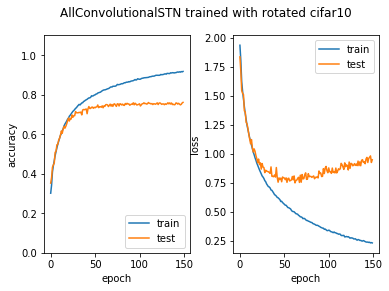

Testing both models on both datasets...


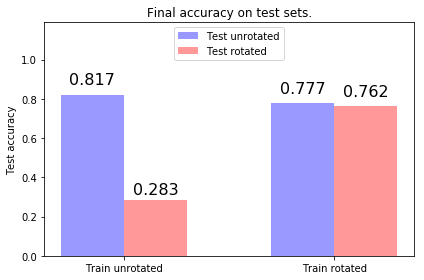

model_rotated_test_dataset score: loss=5.632583, accuracy=0.283500
model_rotated_train_dataset score: loss=5.578414, accuracy=0.292440
model_test_dataset score: loss=0.802800, accuracy=0.817300
model_train_dataset score: loss=0.056914, accuracy=0.980400
rotated_model_rotated_test_dataset score: loss=0.935519, accuracy=0.761800
rotated_model_rotated_train_dataset score: loss=0.197065, accuracy=0.927740
rotated_model_test_dataset score: loss=0.899764, accuracy=0.776900
rotated_model_train_dataset score: loss=0.152816, accuracy=0.945280


In [5]:
import pytorch_experiment
batch_size = 64

epochs={'cifar10':15,'mnist':10,'fashion_mnist':12,'cluttered_mnist':10,'lsa16':15,'mnist_rot':10,'pugeault':15}

rotated_epochs={'cifar10':150,'mnist':20,'fashion_mnist':60,'cluttered_mnist':30,'lsa16':100,'mnist_rot':15,'pugeault':40}

config=pytorch_experiment.TrainRotatedConfig(dataset_name=dataset,batch_size=batch_size,
                   epochs=epochs[dataset],rotated_epochs=rotated_epochs[dataset],
                   pre_rotated_epochs=0, optimizer=optimizer,rotated_optimizer=rotated_optimizer,
                  use_cuda=use_cuda)

scores=pytorch_experiment.train_rotated(config,model,rotated_model,
                                        x_train,y_train,x_test,y_test,plot_accuracy=True)


for k,v in scores.items():
    print('%s score: loss=%f, accuracy=%f' % (k,v[0],v[1]))


ROTATED MODEL
Correction for unrotated images


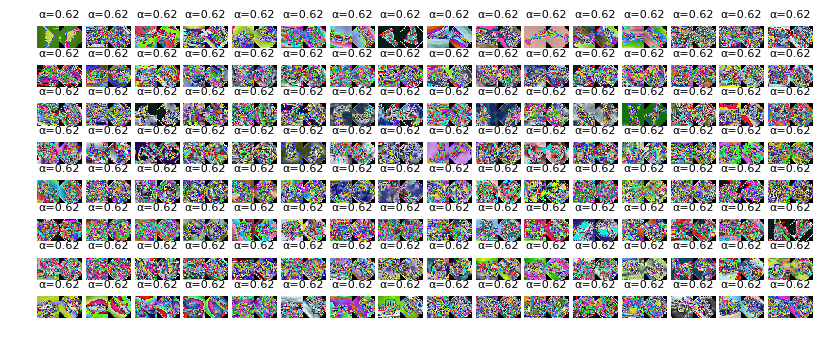

Correction for rotated images


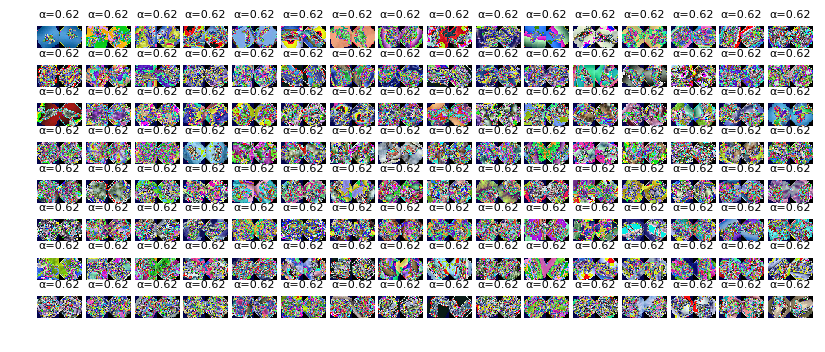

NORMAL MODEL
Correction for unrotated images


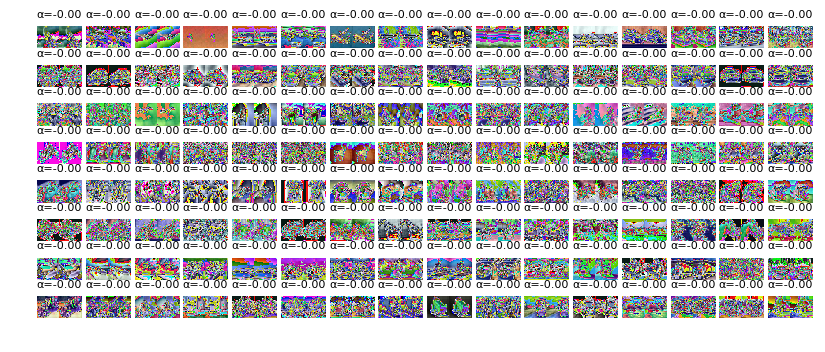

Correction for rotated images


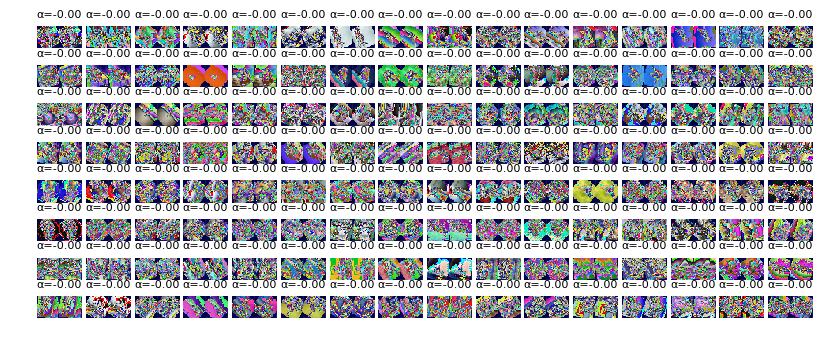

In [6]:
import resource
rlimit = resource.getrlimit(resource.RLIMIT_NOFILE)
resource.setrlimit(resource.RLIMIT_NOFILE, (2048, rlimit[1]))

import numpy as np
def plot_batch(before,after,title,angles,theta):

    n,c,h,w=before.shape
    columns=16
    rows=n // columns + (n % columns>0)

    combination=np.empty((n,c,h,w*2))
    combination[:,:,:,:h]=before
    combination[:, :, :, h:] = after
    combination=combination.transpose(0,2,3,1)

    f, plots = plt.subplots(rows,columns,figsize=(10,4),dpi=100)
    plt.title(title)
    for i in range(rows*columns):
        row, col = i // columns, i % columns
        if i<n:
            if c == 1:
                plots[row,col].imshow(combination[i, :, :, 0])
            else:
                plots[row,col].imshow(combination[i,:,:,:])
            if not (angles is None):
                angle=angles[i]
                cos,sin=theta[i,0],theta[i,1]
                title=f"α={angle:.2f}, {cos:.2}-{sin:.2}"
                title=f"α={angle:.2f}"
                plots[row, col].set_title(title,fontsize=8)
        plots[row, col].axis("off")
    plt.subplots_adjust(hspace=0.2,wspace=0.1)
    plt.show()
    
def plot_stl_rotation(batch_x,batch_y,model,use_cuda,title=""):
    indices=np.argsort(batch_y)
    batch_y=batch_y[indices]
    batch_x=batch_x[indices,:,:,:]
    batch_before = batch_x[:, :, :, :].clone().cpu().detach().numpy()
    batch_after=model.stl(batch_x).clone().cpu().detach().numpy()
    if isinstance(model.stl,pytorch_models.LearnableRotationTransformation):
        theta=model.stl.cos_sin(batch_x)
        theta=theta.clone().cpu().detach().numpy()
        angles= np.arctan(theta[:,1],theta[:,0])
    else:
        theta,angles=None,None
    
    plot_batch(batch_before,batch_after,title,angles,theta)


def plot(model,batches=[0],batch_size=64):
    from torch.utils.data import Dataset,DataLoader
    
    title="Correction for unrotated images"
    print(title)
    image_dataset=pytorch_experiment.ImageDataset(x_test, y_test)
    dataset = list(DataLoader(image_dataset , batch_size=batch_size, shuffle=True, num_workers=1))
    for batch in batches:
        batch_x,batch_y=dataset[batch]
        if use_cuda:
            batch_x=batch_x.cuda()
        
        plot_stl_rotation(batch_x,batch_y,model,use_cuda,title=title)
    
    title="Correction for rotated images"
    print(title)
    image_rotated_dataset = pytorch_experiment.ImageDataset(x_test, y_test, rotation=180)
    rotated_dataset = list(DataLoader(image_rotated_dataset , batch_size=batch_size, shuffle=True, num_workers=1))
    
    for batch in batches:
        batch_x,batch_y=rotated_dataset[batch]
        if use_cuda:
            batch_x=batch_x.cuda()
        
        plot_stl_rotation(batch_x,batch_y,model,use_cuda,title=title)
        
print("ROTATED MODEL")
plot(rotated_model,batches=[0],batch_size=128)
print("NORMAL MODEL")
plot(model,batches=[0],batch_size=128)

In [7]:
from datetime import datetime

output_file="results/all_conv_stn.txt"
f= open(output_file,"a+")
general_message="%s\nResults on dataset %s with model %s and rotated model %s\n" % (str(datetime.now()),dataset,model.name,rotated_model.name)
f.write(general_message)
print(general_message)
for k,v in scores.items():
    message='%s score: loss=%f, accuracy=%f\n' % (k,v[0],v[1])
    print(message)
    f.write(message)
f.write("\nConfig:",str(config))    
f.write("\n\n")    
f.close()

2018-09-11 03:44:50.814676
Results on dataset cifar10 with model AllConvolutionalSTN and rotated model AllConvolutionalSTN

model_rotated_test_dataset score: loss=5.632583, accuracy=0.283500

model_rotated_train_dataset score: loss=5.578414, accuracy=0.292440

model_test_dataset score: loss=0.802800, accuracy=0.817300

model_train_dataset score: loss=0.056914, accuracy=0.980400

rotated_model_rotated_test_dataset score: loss=0.935519, accuracy=0.761800

rotated_model_rotated_train_dataset score: loss=0.197065, accuracy=0.927740

rotated_model_test_dataset score: loss=0.899764, accuracy=0.776900

rotated_model_train_dataset score: loss=0.152816, accuracy=0.945280



TypeError: write() takes exactly one argument (2 given)